In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
import pickle
import logging
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
train_all_features = pd.read_csv('preprocessed_data/train_all_features.csv')
train_selected_features = pd.read_csv('preprocessed_data/train_selected_features.csv')
test_all_features = pd.read_csv('preprocessed_data/test_all_features.csv')
test_selected_features = pd.read_csv('preprocessed_data/test_selected_features.csv')
downsampled_train_all_features = pd.read_csv('preprocessed_data/downsampled_train_all_features.csv')
downsampled_df_selected_features = pd.read_csv('preprocessed_data/downsampled_train_selected_features.csv')

In [8]:


# Dictionary for models
models_dict = {
    'lgbm': lgb.LGBMClassifier,
    'xgb': XGBClassifier,  # Replacing SVM with XGBoost
    'knn': KNeighborsClassifier
}

# Adjusted Dictionary for hyperparameter spaces with fewer options
model_spaces = {
    'lgbm': {
        'learning_rate': [0.1, 0.15, 0.2],   
        'num_leaves': [20, 40, 60],         
        'max_depth': [3, 4],                 
    },
    'xgb': {   # XGBoost hyperparameters
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],       
    }
}

def optimize_and_save_model(model_name, space, df,data_type):
    df.columns = ["".join(e for e in col if e.isalnum() or e == '_') for col in df.columns]
    X = df.iloc[: ,:-1]
    y = df.iloc[:,-1]
    model = models_dict[model_name]()
    
    search = RandomizedSearchCV(model, param_distributions=space, 
                                n_iter=10, scoring='f1_micro', 
                                cv=3, n_jobs=-1, verbose=1)
    
    search.fit(X, y)
    
    # Train and save the best model
    best_model = search.best_estimator_
    joblib.dump(best_model, f'{model_name}_{data_type}_best_model.pkl')
    
    # Return the results
    best_f1 = search.best_score_
    best_params = search.best_params_
    
    return {
        'model': model_name,
        'f1_score': best_f1,
        'best_hyperparameters': best_params
    }


In [9]:
def tune_hyperparams(train, data_type):
    results = []
    for model_name in ['lgbm', 'xgb', 'knn']:
        print(model_name)
        result = optimize_and_save_model(model_name, model_spaces[model_name], train_selected_features,data_type)
        results.append(result)
        
    results_df = pd.DataFrame(results)
    results_df['data_type'] = data_type
    return results_df

In [10]:
selected_features_df = tune_hyperparams(train_selected_features, 'selected_features')
all_features_df = tune_hyperparams(train_all_features, 'all_features')
downsampled_train_all_features_df = tune_hyperparams(downsampled_train_all_features, 'downsampled_all_features')
downsampled_selected_features_df = tune_hyperparams(downsampled_df_selected_features, 'downsampled_selected_features')

lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 50883, number of used features: 70
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Info] Start training from score -1.051905
[LightGBM] [Info] Start training from score -2.192754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052325 seconds.
You c

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


lgbm
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 50883, number of used features: 70
[LightGBM] [Info] Start training from score -0.617819
[LightGBM] [Info] Start training from score -1.051905
[LightGBM] [Info] Start training from score -2.192754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [14]:
df = pd.concat([selected_features_df,all_features_df,downsampled_train_all_features_df,downsampled_selected_features_df])
df_sorted_desc = df.sort_values(by='f1_score', ascending=False)

In [15]:
df_sorted_desc

,model,f1_score,best_hyperparameters,data_type
1,xgb,0.594846,"{'subsample': 1.0, 'n_estimators': 500, 'max_d...",selected_features
1,xgb,0.594230,"{'subsample': 0.7, 'n_estimators': 200, 'max_d...",downsampled_selected_features
0,lgbm,0.593509,"{'num_leaves': 60, 'max_depth': 4, 'learning_r...",selected_features
0,lgbm,0.593509,"{'num_leaves': 20, 'max_depth': 4, 'learning_r...",all_features
0,lgbm,0.593509,"{'num_leaves': 40, 'max_depth': 4, 'learning_r...",downsampled_selected_features
1,xgb,0.593234,"{'subsample': 0.5, 'n_estimators': 200, 'max_d...",all_features
0,lgbm,0.592867,"{'num_leaves': 20, 'max_depth': 4, 'learning_r...",downsampled_all_features
1,xgb,0.590208,"{'subsample': 1.0, 'n_estimators': 500, 'max_d...",downsampled_all_features
2,knn,0.519928,{'n_neighbors': 9},selected_features
2,knn,0.519928,{'n_neighbors': 9},all_features


In [16]:
model = joblib.load('xgb_selected_features_best_model.pkl')

In [18]:
test_selected_features.columns = ["".join(e for e in col if e.isalnum() or e == '_') for col in test_selected_features.columns]
X = test_selected_features.iloc[: ,:-1]
y = test_selected_features.iloc[:,-1]

In [19]:
preds = model.predict(X)
preds

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
test_all_features['preds'] = preds

F1 Micro Score: 0.591659460734219


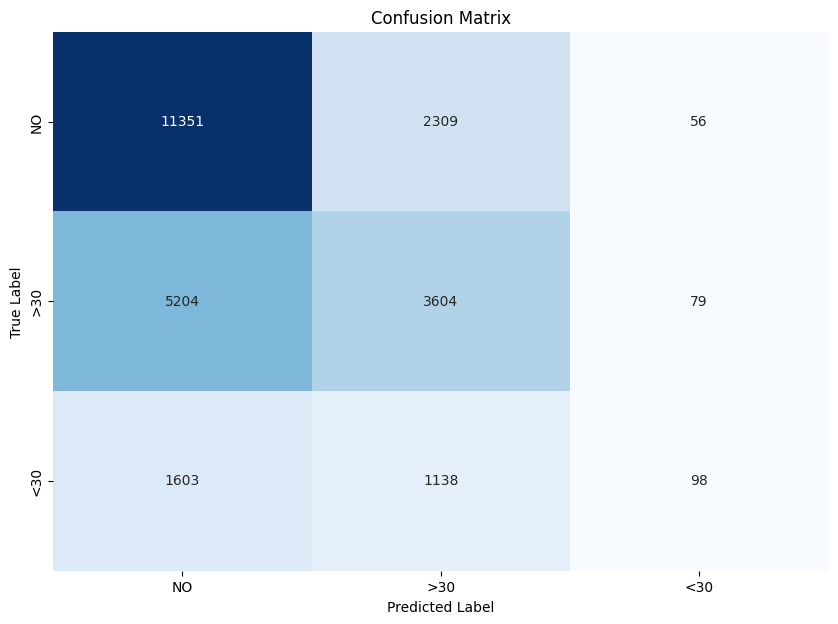

In [21]:
matrix = confusion_matrix(test_all_features['readmitted'], test_all_features['preds'])

score = f1_score(test_all_features['readmitted'], test_all_features['preds'], average='micro')
print(f"F1 Micro Score: {score}")

labels = ['NO', '>30', '<30']

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            yticklabels=labels, xticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Conclusions
* The best performing models were XGBOOST and LightGBM.
* The feature selection and balancing the data didn't contribute a significant effect to the models' performance.
* The test value F1 score didn't decrease much from the train set, meaning the model isn't overfitted.
* Further steps to find a better model can be trying additional models with wider hyperparameter spaces